<br>
<u>Notebook Three</u> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Tags vectorisation</b><br><br>
Andrea Leone<br>
University of Trento<br>
January 2022
<br><br>

In [1]:
import project 

import numpy  as np
import pandas as pd
import collections

import sklearn
import sklearn.decomposition
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

plt.rcParams['figure.figsize'] = [ 20.0, 9.0 ]
plt.rcParams['figure.dpi']     =  150
plt.rcParams['font.family']    = 'Graphik'

<br>Analyse the tag distribution in the database:<br>
extract all tags of each talk and store them in a set

In [2]:
records = project.sql_query("SELECT tags, slug FROM talks ORDER BY slug ASC;") 
tags    = collections.Counter()

for record in records : tags.update( record[0] )

len(records), len(tags)

(5529, 349)

<br>Get the frequency of each tag in the set

In [3]:
tags.most_common()[:15]

[('science', 1246),
 ('technology', 1207),
 ('ted-ed', 848),
 ('culture', 814),
 ('animation', 773),
 ('education', 737),
 ('society', 704),
 ('tedx', 691),
 ('social change', 665),
 ('global issues', 656),
 ('business', 598),
 ('design', 591),
 ('history', 579),
 ('health', 567),
 ('innovation', 493)]

<br>Plot the tag frequency distribution

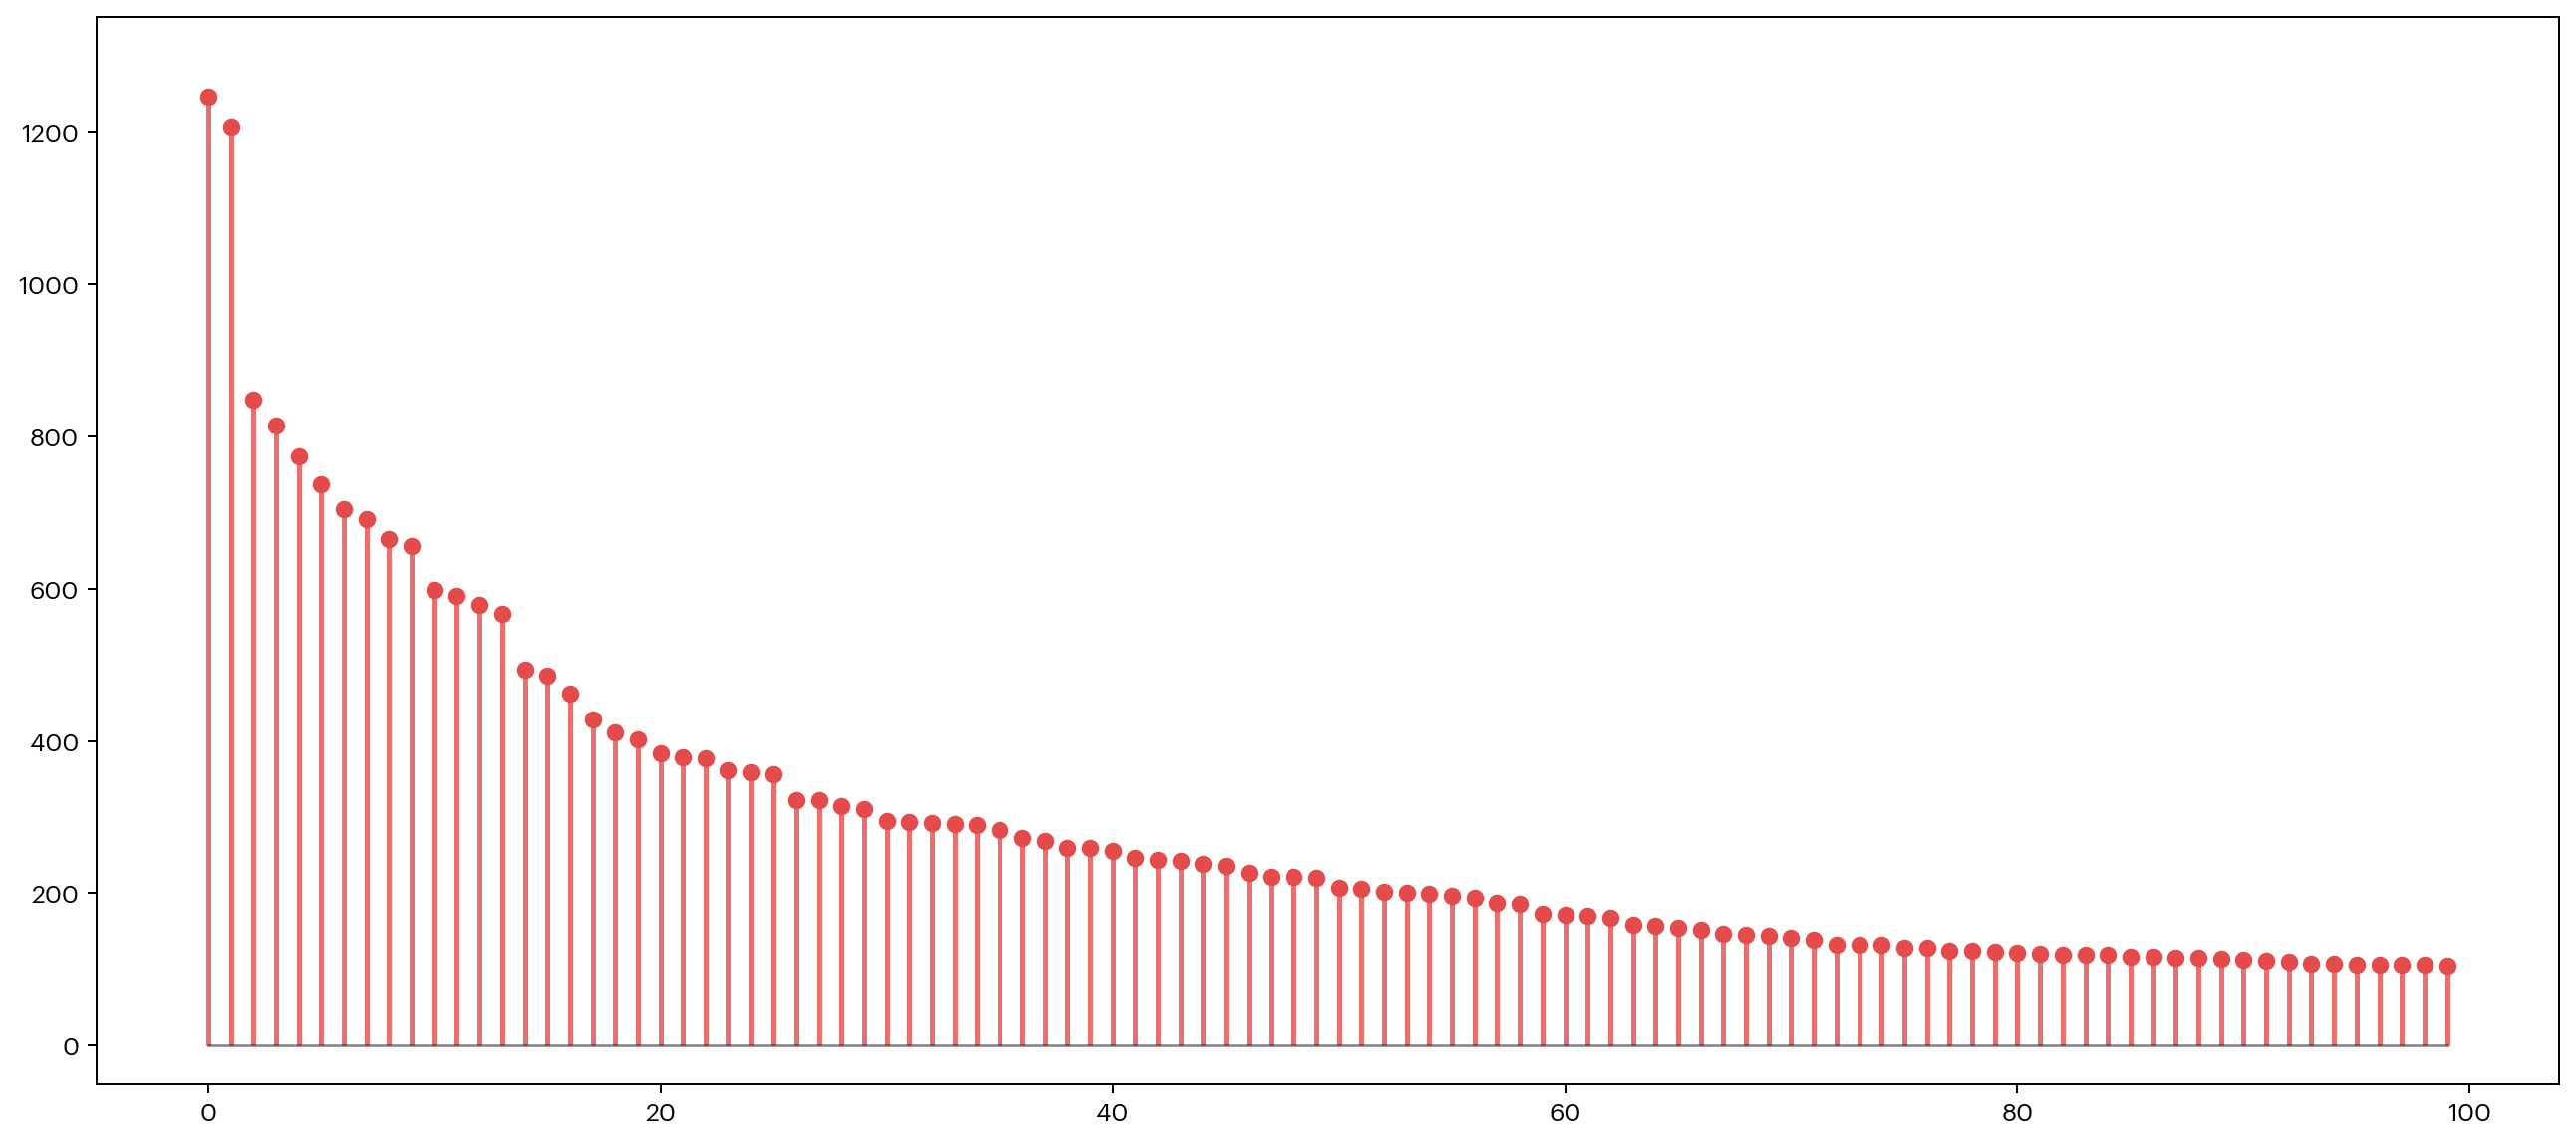

In [4]:
tag_collection = [y for x, y in tags.most_common()] 

plt.figure( figsize=(45/2.54, 20/2.54), dpi=180 )

markerline, stemlines, baseline = plt.stem( 
    sorted( tag_collection, reverse=True )[:100]
)

plt.setp(baseline,   linewidth=1, alpha=.5, color="black")
plt.setp(stemlines,  linewidth=2, alpha=.8, color="#E54B4B")
plt.setp(markerline, linewidth=0, alpha=1,  color="#E54B4B", marker="o")

plt.ylim(-50, 1350)
plt.show()

<br>Tags are manifold: select a bunch and check the frequency

In [5]:
tag_frequency = dict(tags.most_common())

In [6]:
tag_names = [ 
    'life', 'health', 'happiness', 'identity', 'love', 'nature', 'money', 'society', 'culture',
    'global issues', 'social change', 'sustainability', 'history', 'biology', 'humanity',
    'art', 'literature', 'creativity', 'engineering', 'journalism', 'communication',
    'education', 'business', 'democracy', 'ethics', 'poverty',
    'food', 'climate change', 'coronavirus', 'immigration', 'activism', 'goals',
    'future', 'science', 'innovation', 'technology', 'internet', 'software', 'ai'
]

tag_frequency  = dict(tags.most_common())
tag_counts     = [ tag_frequency[tag] for tag in tag_names ]
tag_collection = [ y for x,y in sorted( dict(zip(tag_names, tag_counts)).items(), key=lambda x : x[1], reverse=True ) ]

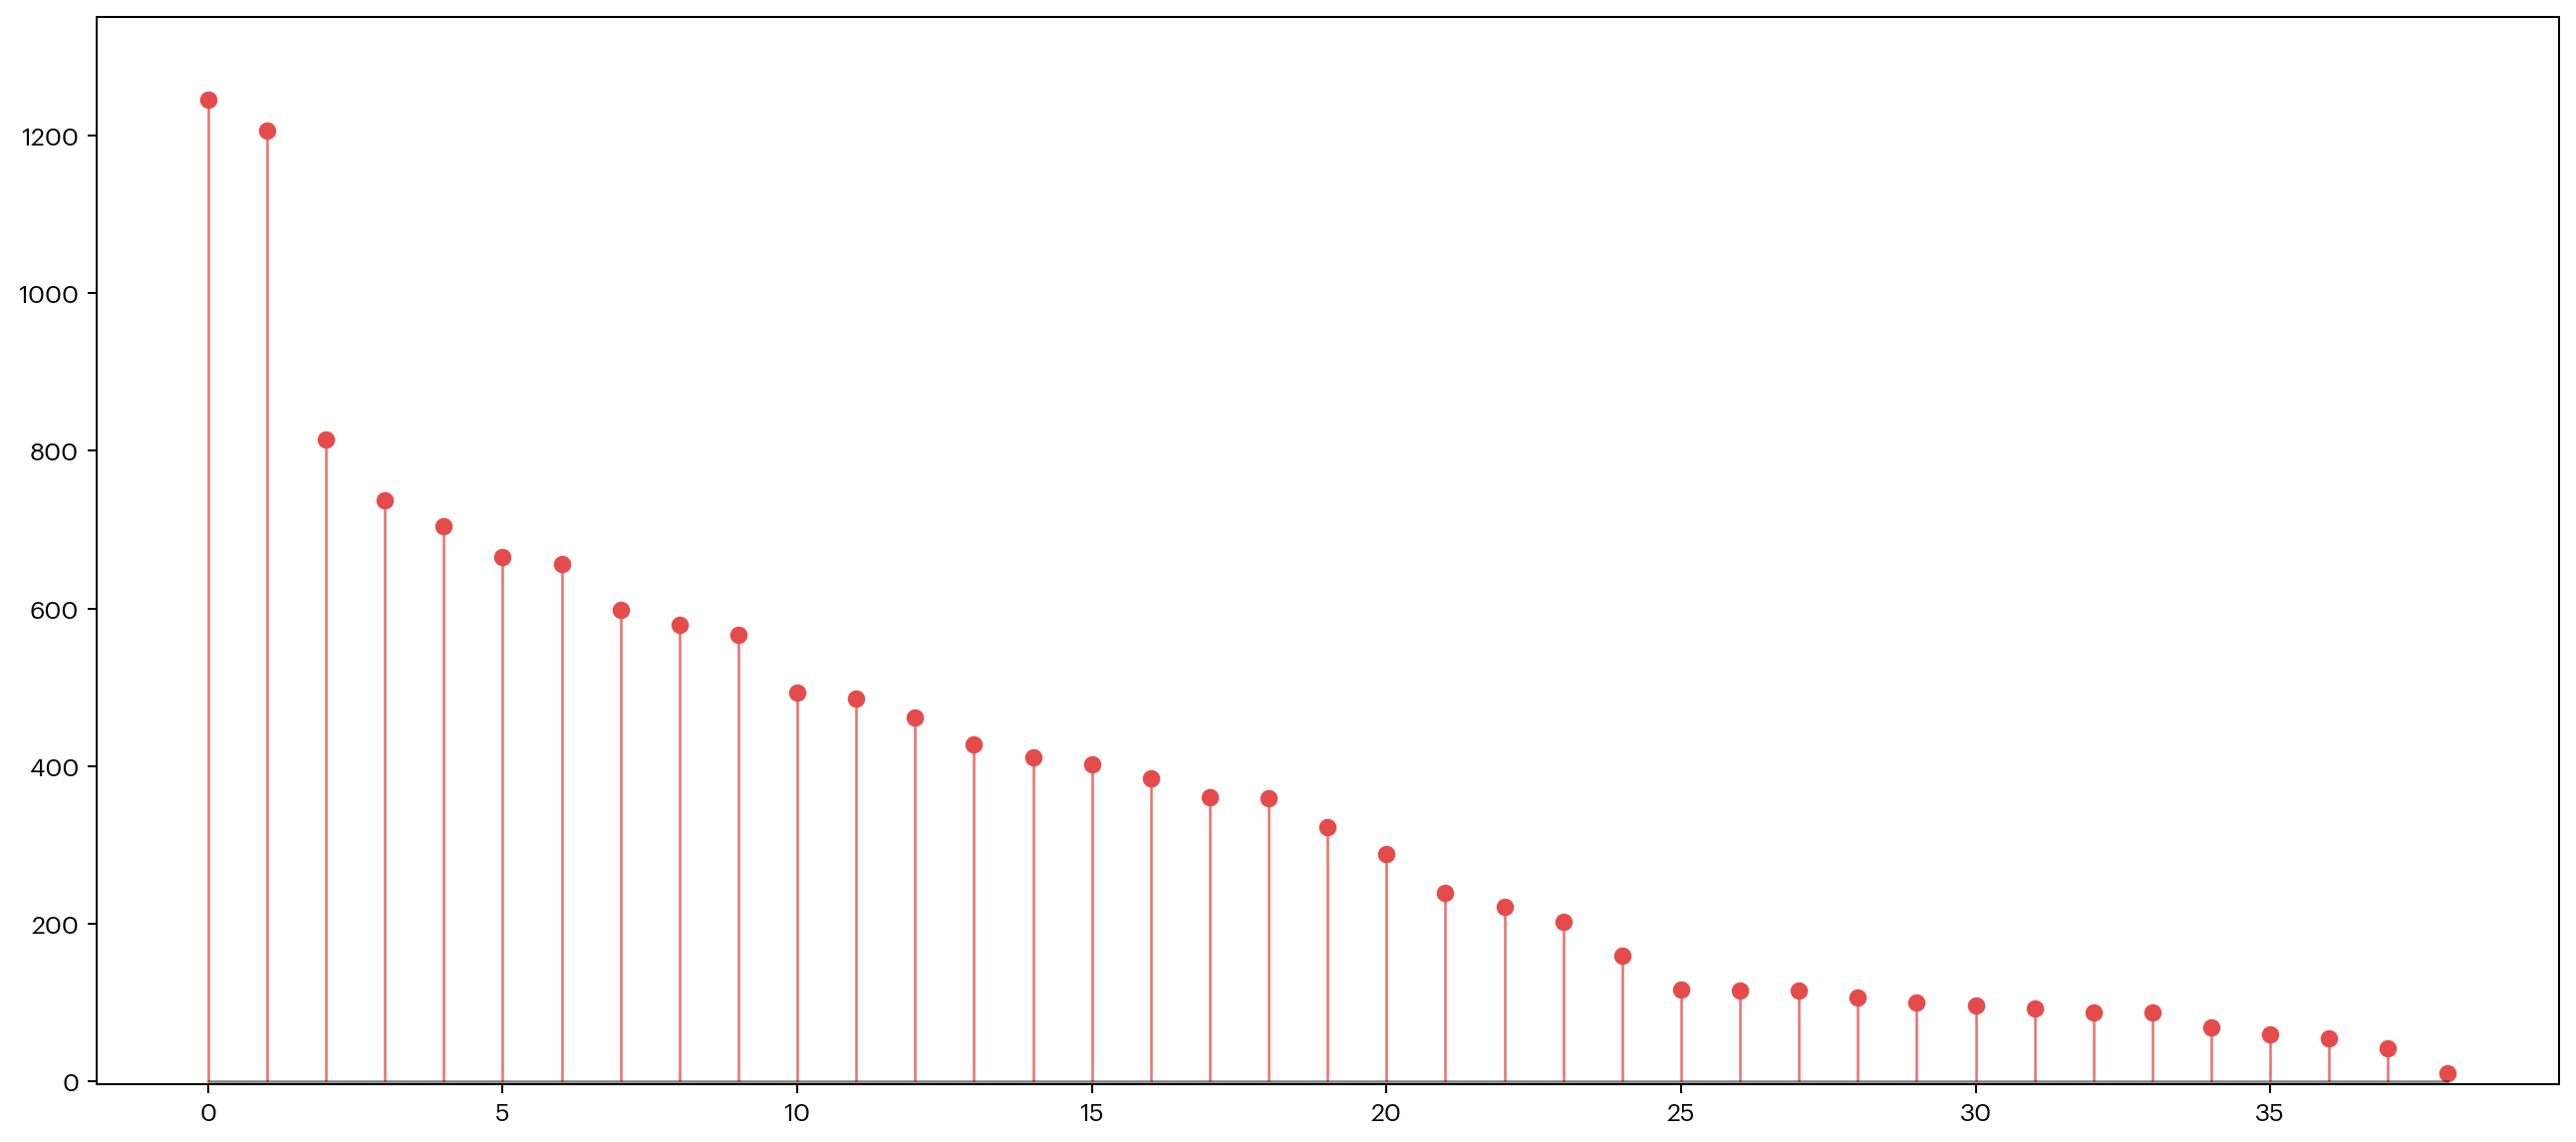

[('science', 1246),
 ('technology', 1207),
 ('culture', 814),
 ('education', 737),
 ('society', 704),
 ('social change', 665),
 ('global issues', 656),
 ('business', 598),
 ('history', 579),
 ('health', 567),
 ('innovation', 493),
 ('humanity', 486),
 ('biology', 462),
 ('communication', 428),
 ('art', 411)]

In [7]:
plt.figure( figsize=(45/2.54, 20/2.54), dpi=180 ) 

markerline, stemlines, baseline = plt.stem( 
    sorted( tag_collection, reverse=True )[:100]
)

plt.setp(baseline,   linewidth=1, alpha=.5, color="black")
plt.setp(stemlines,  linewidth=1, alpha=.8, color="#E54B4B")
plt.setp(markerline, linewidth=0, alpha=1,  color="#E54B4B", marker="o")

plt.ylim(-3, 1350)
plt.show()

sorted( dict(zip(tag_names, tag_counts)).items(), key=lambda x : x[1], reverse=True )[:15]

<br>Create a dictioary with three main categories, each one collecting the tags that describe or concern it.

In [8]:
tag_dict = { 
    
    'science and innovation': [
        'biology', 'technology', 'ai', 'future', 'medicine', 'brain', 'math',
        'science', 'innovation', 'invention', 'engineering', 'medical research',
        'internet', 'space', 'media', 'computers', 'data', 'disease', 'demo',
        'evolution', 'physics', 'exploration', 'mental health', 'neuroscience',
        'architecture', 'illness', 'universe', 'visualizations', 'law', 'software',
        'genetics', 'virus', 'robots', 'biotech', 'cancer', 'aging', 'cognitive science',
        'astronomy', 'infrastructure', 'dna', 'algorithm', 'memory', 'youth', 'product design',
        'insects', 'ethics', 'coronavirus', 'machine learning', 'investing',
        'chemistry', 'code', 'anthropology', 'countdown', 'microbiology',
        'best of the web', 'curiosity', 'statistics', 'online privacy', 'vaccines',
        'anthropocene', 'time', 'sight', 'industrial design', 'discovery', 'solar system',
        'flight', 'sound', 'bioethics', 'surveillance', 'audacious project',
        'nanotechnology', 'encryption', 'maps', 'biomimicry', 'drones', 'virtual reality',
        'surgery', 'heart', 'quantum', 'telescopes', 'synthetic biology', 'big bang',
        'aliens', 'medical imaging', 'botany', 'dark matter', 'paleontology', 'mars',
        'cyber security', 'exercise', 'television', 'toys', 'astrobiology', 'nuclear energy',
        'geology', 'driverless cars', 'rocket science', 'blockchain', 'string theory',
        'augmented reality', 'cryptocurrency', 'crispr'
    ],
    
    'culture and society': [
        'education', 'history', 'humanity', 'art', 'communication', 'entertainment',
        'community', 'activism', 'psychology', 'politics', 'women', 'identity',
        'social change', 'health', 'journalism', 'storytelling', 'depression', 'feminism',
        'government', 'equality', 'public health', 'race', 'gender', 'refugees',
        'humor', 'language', 'violence', 'family', 'diversity', 'self', 'religion',
        'society', 'culture', 'democracy', 'happiness', 'books', 'relationships',
        'philosophy', 'poetry', 'parenting', 'social media', 'death', 'literature',
        'emotions', 'beauty', 'ancient world', 'sex', 'love', 'crime', 'public space',
        'justice system', 'compassion', 'empathy', 'comedy', 'disability',
        'consciousness', 'life', 'lgbtqia+', 'dance', 'drugs', 'fear', 'philanthropy',
        'gaming', 'terrorism', 'prison', 'corruption', 'personality', 'sociology',
        'illusion', 'spoken word', 'aids', 'sexual violence', 'trust', 'slavery',
        'transgender', 'pain', 'library', 'protest', 'painting', 'meditation',
        'inclusion', 'addiction', 'museums', 'friendship', 'mindfulness', 'vulnerability',
        'human rights', 'body language', 'public speaking', 'bullying', 'suicide',
        'atheism', 'autism spectrum disorder', 'grammar'
    ],
    
    'economy and environment': [
        'business', 'design', 'creativity', 'economics', 'personal growth', 'performance',
        'environment', 'climate change', 'nature', 'war', 'sustainability', 'animals',
        'global issues', 'human body', 'kids', 'united states', 'india', 
        'music', 'work', 'africa', 'leadership', 'cities', 'ocean', 'food', 'writing',
        'collaboration', 'health care', 'energy', 'photography', 'decision-making', 'policy',
        'entrepreneur', 'potential', 'motivation', 'film', 'biodiversity',
        'international development', 'teaching', 'poverty', 'pollution', 'money', 'finance',
        'water', 'success', 'ecology', 'transportation', 'agriculture', 'sports', 'goals',
        'fish', 'bacteria', 'marine biology', 'planets', 'resources', 'urban planning',
        'conservation', 'plants', 'electricity', 'work-life balance', 'renewable energy',
        'natural disaster', 'pandemic', 'natural resources', 'farming', 'marketing',
        'productivity', 'ux design', 'consumerism', 'fashion', 'behavioral economics',
        'military', 'sleep', 'solar energy', 'trees', 'theater', 'weather', 'archaeology',
        'biosphere', 'capitalism', 'manufacturing', 'gardening', 'travel', 'mission blue',
        'birds', 'plastic', 'graphic design', 'fossil fuels', 'europe', 'women in business',
        'middle east', 'china', 'asia', 'indigenous peoples', 'immigration', 'south america',
        'international relations', 'sun', 'moon', 'bees', 'wind energy', 'rivers',
        'glaciers', 'coral reefs', 'microbes', 'deextinction'
    ],
    
    'extra': [
        'tedx', 'ted-ed', 'ted connects', 'ted membership', 'ted fellows', 'ted prize',
        'ted residency', 'ted membership', 'interview', 'podcast', 'crowdsourcing'
    ]
    
}

<br>Assign each record to one of the three categories

In [ ]:
# careful! 

for record in tqdm( records ):

    tags = record[0]
    slug = record[1]

    dct = {
        'science and innovation'  : 0,
        'culture and society'     : 0,
        'economy and environment' : 0
    }

    for tag in tags:
        for label in list(dct.keys()):
            if tag in tag_dict[label]:
                dct[label] += 1
    
    value = list( dct.values() ).index( max( dct.values() ) )
    
    project.sql_commit("UPDATE talks SET category='{0}' WHERE slug='{1}'".format(value, slug))

<br>Explore the data distribution according to the three categories.

In [9]:
records = project.sql_query(""" 
    SELECT category, slug FROM talks
    WHERE vector IS NOT NULL
    ORDER BY slug ASC;
""")

categories, slugs = project.unzip_array( records )
collections.Counter(categories)

Counter({1: 1918, 2: 1301, 0: 1655})

<br>Data seems quite balanced. Now, load and compress the vectors.

In [10]:
pca = lambda X : sklearn.decomposition.PCA(n_components=3).fit_transform(X) 

transcript_vectors = project.sql_query("""
    SELECT vector, vector_trf FROM talks
    WHERE vector IS NOT NULL
    ORDER BY slug ASC;
""")

vectors, vectors_trf   = project.unzip_array( transcript_vectors )
compressed_vectors     = pca( vectors )

<br>Arrange the data for a 3D-scatterplot and see the result

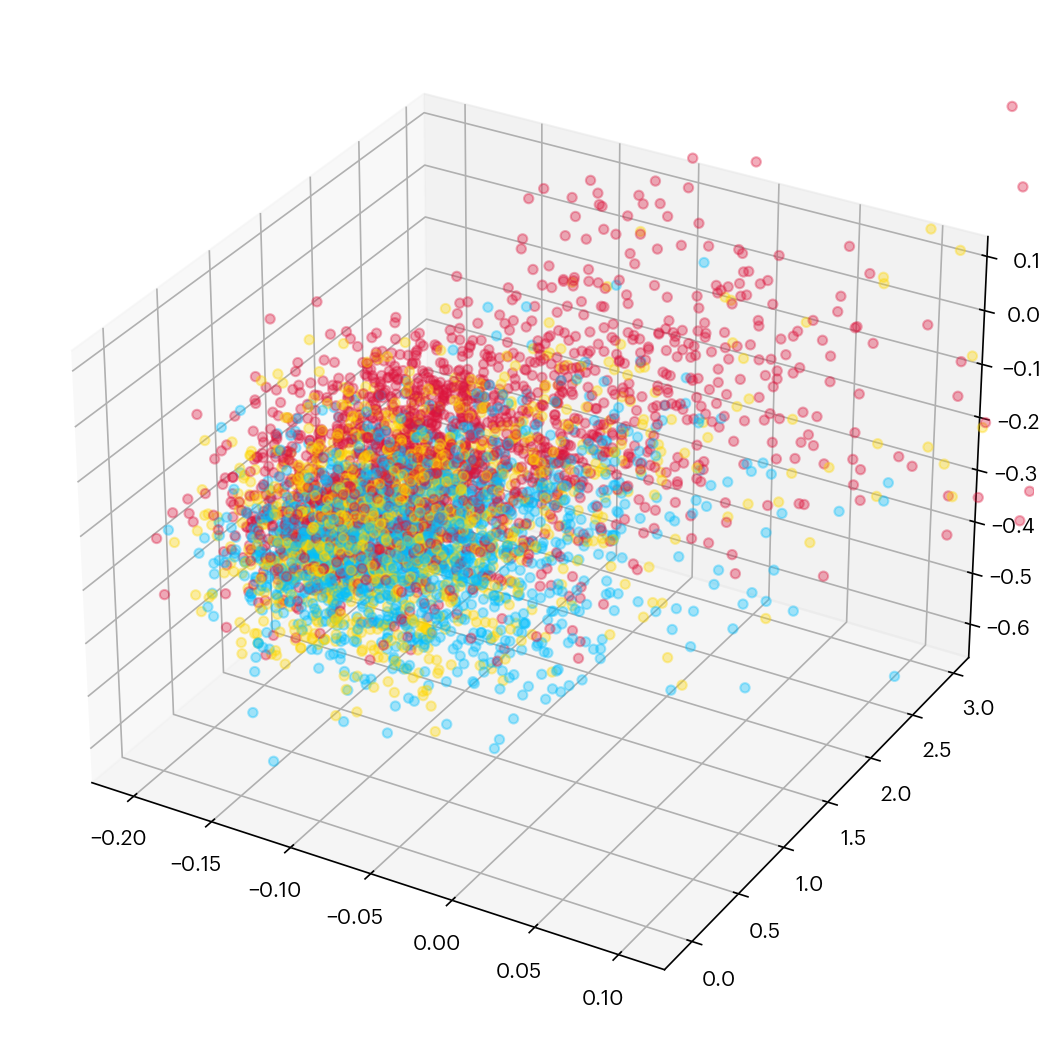

In [11]:
scatter_data   = list( zip(categories, compressed_vectors) ) 
scatter_colors = [ 'deepskyblue', 'crimson', 'gold' ]

project.scatterplot3 (scatter_data, scatter_colors, xl=(-0.22,+0.12), yl=(-0.22,+3.12), zl=(-0.65,+0.12)) 

<br>